In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

Test1 = pd.read_excel('Reflux_data/Final_V4/Final_V4_test01.xlsx')



In [2]:
x1 = Test1.drop(['DIST'], axis= 1)
x2 = Test1['DIST']

In [4]:
Test1[Test1['DIST']==1].count()

ADM_CD            643
ZONE              643
Dong              643
SEQ               643
DISTRICT          643
F_BEGIN_DE        643
F_END_DE          643
F_BEGIN_TM        643
F_END_TM          643
FLUD_TIME         643
FLUD_DPWT         643
SLOPE_L           643
SLOPE_H           643
SLOPE_AVG         643
HIGH              643
PUMP_RATIO        643
IMP_SUR_RATIO     643
MANHOLES_RATIO    643
HOUR_RAINFALL     643
PRECI_YYMMDDHH    643
PRECI_HH          643
DIST              643
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x1, x2, test_size=0.3, random_state=777)
print(len(X_train), len(X_test),len(y_train),len(y_test))
# print(X_train[:3])
# print(X_test[:3])
# print(y_train)

900 386 900 386


In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

ValueError: could not convert string to float: '해운대구'

In [175]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # 정규화 라이브러리

In [7]:
for col in range(4):
    print(f'평균 = {X_train[:, col].mean()}, 표준편차= {X_train[:, col].std()}')
for col in range(4):
    print(f'평균 = {X_test[:, col].mean()}, 표준편차= {X_test[:, col].std()}')

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [176]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
y_pred = classifier.predict(X_test)
print(y_pred)

NameError: name 'classifier' is not defined

In [178]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

report = classification_report(y_test, y_pred)
print(report)

[[193   8]
 [ 11 190]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       201
           1       0.96      0.95      0.95       201

    accuracy                           0.95       402
   macro avg       0.95      0.95      0.95       402
weighted avg       0.95      0.95      0.95       402



[0.022727272727272728, 0.02904040404040404, 0.026936026936026935, 0.030303030303030304, 0.0281986531986532, 0.032407407407407406, 0.030723905723905723, 0.03367003367003367, 0.03282828282828283, 0.0361952861952862, 0.034511784511784514, 0.0382996632996633, 0.037037037037037035, 0.040824915824915826, 0.039141414141414144, 0.041666666666666664, 0.03956228956228956, 0.04208754208754209, 0.041245791245791245, 0.04335016835016835, 0.04250841750841751, 0.04755892255892256, 0.045875420875420875, 0.04713804713804714, 0.04713804713804714, 0.049663299663299666, 0.050084175084175085, 0.050505050505050504, 0.04924242424242424, 0.05387205387205387]


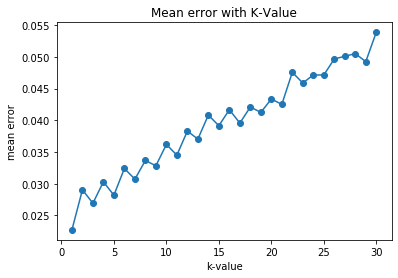

In [105]:
errors = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
print(errors)

plt.plot(range(1, 31), errors, marker='o')
plt.title('Mean error with K-Value')
plt.xlabel('k-value')
plt.ylabel('mean error')
plt.show()

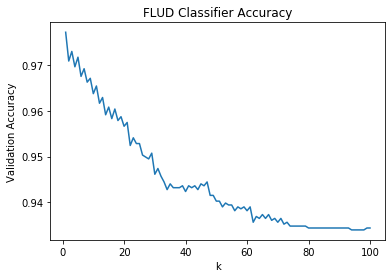

In [104]:
k_list = range(1,101)
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("FLUD Classifier Accuracy")
plt.show()